In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy.linalg import eig
from numpy import cov
from pylab import imread,subplot,imshow,title,gray,figure,show,NullLocator

Model: "encoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 784)]             0         
                                                                 
 encoder_dense_1 (Dense)     (None, 300)               235500    
                                                                 
 encoder_leakyrelu_1 (Leaky  (None, 300)               0         
 ReLU)                                                           
                                                                 
 encoder_dense_2 (Dense)     (None, 2)                 602       
                                                                 
 encoder_output (LeakyReLU)  (None, 2)                 0         
                                                                 
Total params: 236102 (922.27 KB)
Trainable params: 236102 (922.27 KB)
Non-trainable params: 0 (0.00 Byte)
_____________

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.0472 - val_loss: 0.0378
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0366 - val_loss: 0.0356
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0350 - val_loss: 0.0343
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0341 - val_loss: 0.0338
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0335 - val_loss: 0.0333
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0330 - val_loss: 0.0328
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0326 - val_loss: 0.0323
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0323 - val_loss: 0.0328
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0321 - val_loss: 0.0321
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0318 - val_loss: 0.0318

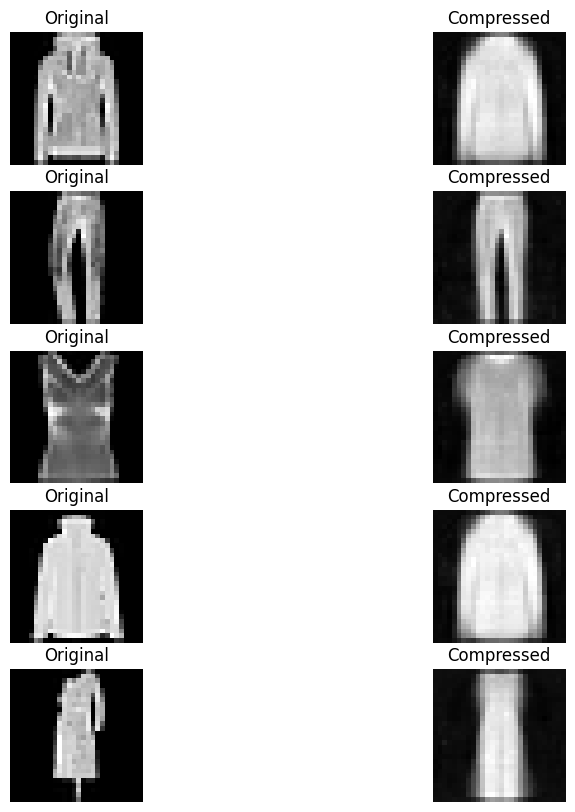

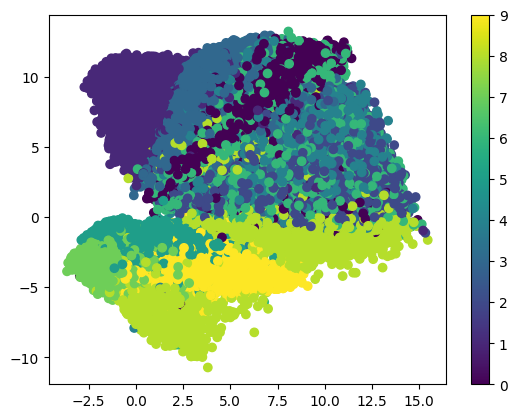

In [ ]:
import tensorflow.keras.layers
import tensorflow.keras.models
import tensorflow.keras.optimizers
import tensorflow.keras.datasets
import numpy
import matplotlib.pyplot

# Encoder
x = tensorflow.keras.layers.Input(shape=(784), name="encoder_input")

encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="encoder_dense_1")(x)
encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=2, name="encoder_dense_2")(encoder_activ_layer1)
encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer2)

encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")
encoder.summary()

# Decoder
decoder_input = tensorflow.keras.layers.Input(shape=(2), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="decoder_dense_1")(decoder_input)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)

decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")
decoder.summary()

# Autoencoder
ae_input = tensorflow.keras.layers.Input(shape=(784), name="AE_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)

ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")
ae.summary()

# RMSE
def rmse(y_true, y_predict):
    return tensorflow.keras.backend.mean(tensorflow.keras.backend.square(y_true-y_predict))

# AE Compilation
ae.compile(loss="mse", optimizer=tensorflow.keras.optimizers.Adam(lr=0.0005))

# Preparing MNIST Fashion Dataset
(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.fashion_mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = numpy.reshape(x_train_orig, newshape=(x_train_orig.shape[0], numpy.prod(x_train_orig.shape[1:])))
x_test = numpy.reshape(x_test_orig, newshape=(x_test_orig.shape[0], numpy.prod(x_test_orig.shape[1:])))

# Training AE
ae.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

encoded_images = encoder.predict(x_train)
decoded_images = decoder.predict(encoded_images)
decoded_images_orig = numpy.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))

num_images_to_show = 5

fig, axes = plt.subplots(num_images_to_show, 2, figsize=(10, 2*num_images_to_show))

for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2

    rand_ind = np.random.randint(low=0, high=x_train.shape[0])

    axes[im_ind, 0].imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    axes[im_ind, 0].axis('off')
    axes[im_ind, 0].set_title('Original')

    axes[im_ind, 1].imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")
    axes[im_ind, 1].axis('off')
    axes[im_ind, 1].set_title('Compressed')

plt.show()

plt.figure()
plt.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_train)
plt.colorbar()
plt.show()

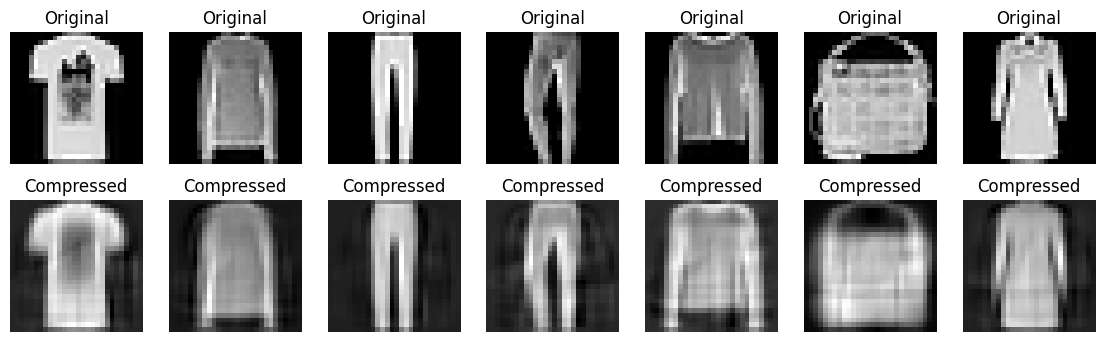

In [ ]:
#PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import fashion_mnist

# Preparing MNIST Fashion Dataset
(x_train_orig, y_train), (x_test_orig, y_test) = fashion_mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = np.reshape(x_train_orig, newshape=(x_train_orig.shape[0], np.prod(x_train_orig.shape[1:])))
x_test = np.reshape(x_test_orig, newshape=(x_test_orig.shape[0], np.prod(x_test_orig.shape[1:])))

# Perform PCA for image compression
n_components = 50  # Ubah nilai ini sesuai kebutuhan
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Inverse transform to obtain compressed images
x_train_compressed = pca.inverse_transform(x_train_pca)
x_test_compressed = pca.inverse_transform(x_test_pca)

# Reshape compressed images back to original shape
x_train_compressed = np.reshape(x_train_compressed, newshape=x_train_orig.shape)
x_test_compressed = np.reshape(x_test_compressed, newshape=x_test_orig.shape)

num_images = 7  # Jumlah gambar yang ingin ditampilkan
fig, axes = plt.subplots(2, num_images, figsize=(2*num_images, 4))

for i in range(num_images):
    rand_ind = np.random.randint(low=0, high=len(x_train_orig))  # Randomly select an index

    axes[0, i].imshow(x_train_orig[rand_ind], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    axes[1, i].imshow(x_train_compressed[rand_ind], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title('Compressed')

plt.show()

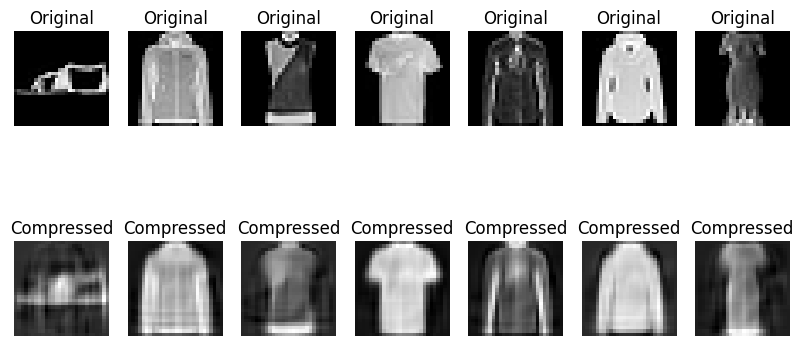

In [ ]:
#Autoencoder
num_images_to_show = 7

fig, axes = plt.subplots(2, num_images_to_show, figsize=(10, 5))

for im_ind in range(num_images_to_show):
    plot_ind = im_ind * 2

    rand_ind = np.random.randint(low=0, high=len(x_train_orig))

    axes[0, im_ind].imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    axes[0, im_ind].axis('off')
    axes[0, im_ind].set_title('Original')

    axes[1, im_ind].imshow(x_train_compressed[rand_ind, :, :], cmap="gray")  # Use x_train_compressed instead of decoded_images_orig
    axes[1, im_ind].axis('off')
    axes[1, im_ind].set_title('Compressed')

plt.show()